In [100]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [101]:
df=pd.read_csv('CAvideos.csv')

In [102]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]#type on google #color code 
pd.options.display.float_format = '{:.2f}'.format # round to two decimal places in python pandas
sns.set(style="ticks")

# Matplotlib also provides a couple of convenience functions for modifying rc settings.
# matplotlib.rc can be used to modify multiple settings in a single group at once

plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)


In [103]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [104]:
df=pd.read_csv('CAvideos.csv')

In [105]:
# The description column has some null values.These are some of the rows with null description valuesSo, 
# to do some sort of data cleaning and to get rid of those null values,I’m going to put an empty string
# in place of each null value in the Description column

df["description"] = df["description"].fillna(value="")

In [106]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.00,40881.00,40881.00,40881.00,40881.00
mean,20.80,1147035.91,39582.69,2009.20,5042.97
std,6.78,3390913.02,132689.53,19008.37,21579.02
min,1.00,733.00,0.00,0.00,0.00
25%,20.00,143902.00,2191.00,99.00,417.00
50%,24.00,371204.00,8780.00,303.00,1301.00
75%,24.00,963302.00,28717.00,950.00,3713.00
max,43.00,137843120.00,5053338.00,1602383.00,1114800.00


***
**The average number of views of a trending video is 11,47,035.
The median value of the number of views is 3,71,204, which means that half of the trending videos have less than this
number and the other half have views greater than this number**
***

In [107]:
# Now we want to see how many trending video titles have at least one uppercase word (eg WHAT).
# To do this, we’ll add a new variable to the dataset whose value is True if the video title contains at least one uppercase word,
# and False otherwise
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


In [108]:
df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

In [109]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,False
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,True
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,False


In [110]:
len(df[df["contains_capitalized"]])

20207

In [111]:
len(df)

40881

In [112]:
20207/40881


0.49428830018835157

In [113]:
value_counts = df["contains_capitalized"].value_counts().to_dict()

In [114]:
value_counts

{False: 20674, True: 20207}

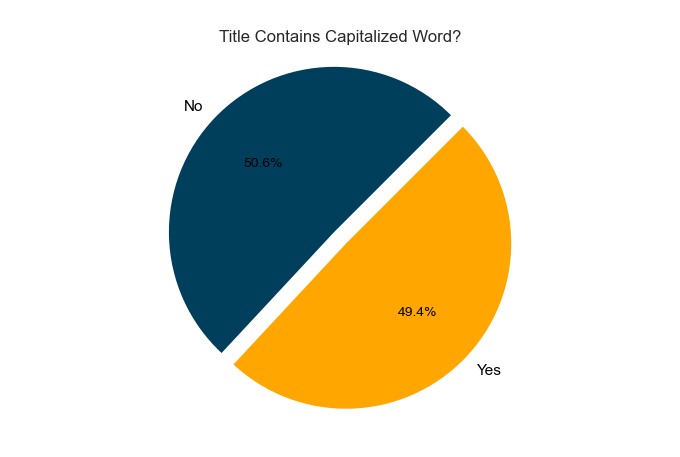

In [115]:
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45,explode = [0.1, 0]#gap
        ,autopct='%1.1f%%'#make % in chart
       )
plt.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Title Contains Capitalized Word?')
plt.show()

**We can see that 49% of trending video titles contain at least one word in all caps.**

In [116]:
#the title length histogram to get an idea of the length of trending video titles
df["title_length"] = df["title"].apply(lambda x: len(x))

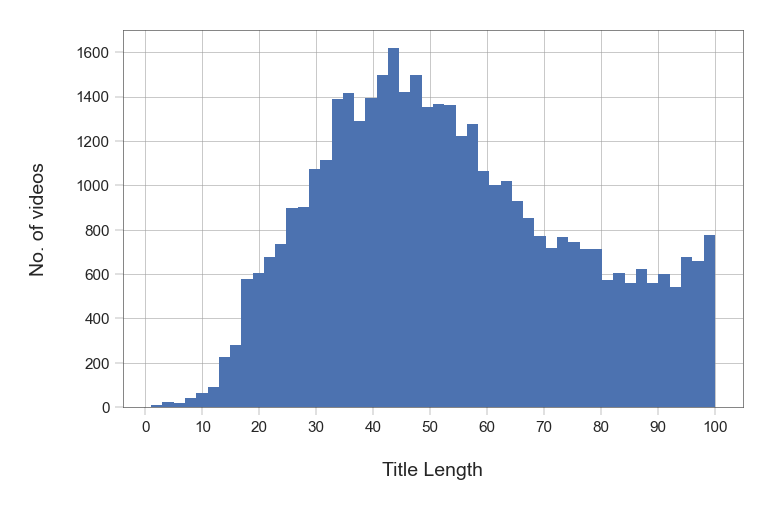

In [117]:
sns.distplot(df["title_length"], kde=False, rug=False, 
                  hist_kws={'alpha': 1}).set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))
plt.show()

***We can see that the videos title length distribution looks like a normal distribution,
where most videos have a title length of around 30-60 characters.***

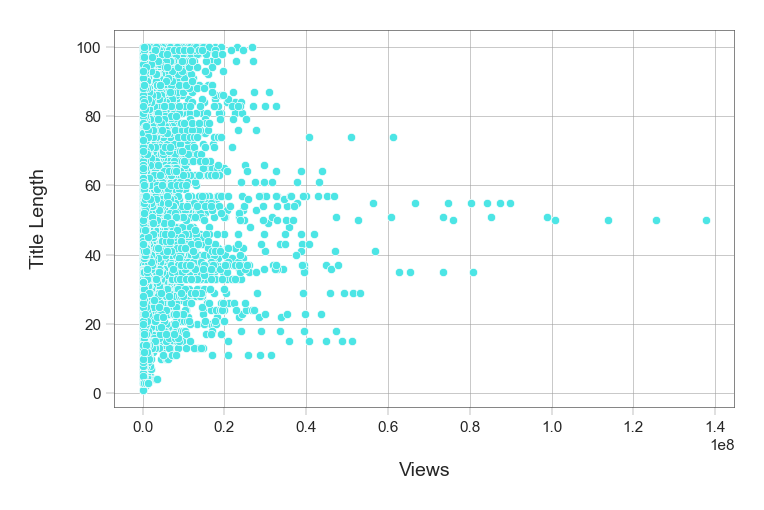

In [118]:
# Now, let’s draw a scatter plot to analyze the relationship between the title length and the number of views
sns.scatterplot(x=df['views'], y=df['title_length'], color='#4CE5E5', 
                edgecolors="#EB5A33", linewidths=0.5).set(xlabel="Views",
                 ylabel="Title Length")
plt.show()

***
**Looking at the scatter plot, we can tell that there is no relationship between the length of the title and the number of views.**

***

## Youtube Trending Videos Analysis: Correlation


In [119]:
# how the variables in the dataset correlate to each other: for example, we would like to see how views and likes correlate,
# meaning that views and likes increase and decrease together
# df.corr()

In [120]:

h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

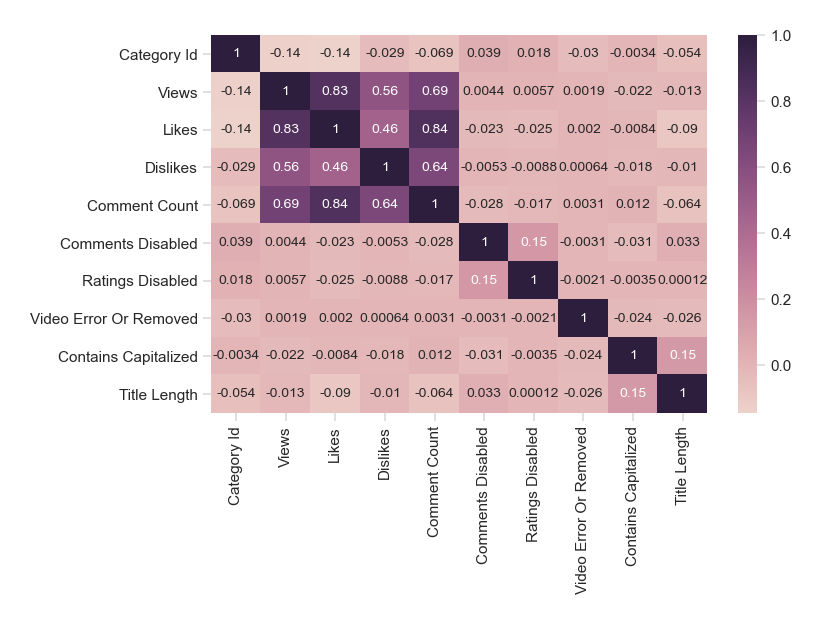

In [121]:
sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

***
**The correlation map and correlation table above indicate that views and likes are strongly positively correlated.**
***


In [122]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,contains_capitalized,title_length
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,False,42
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,True,29
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,False,53
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,True,24
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,False,43


# Hastag is too popular here we will check that it may effective in tranding or not

In [163]:
n=[abs(i) for i in df['description'].str.count('#')]

In [168]:
n0=[]
n1=[]
n2=[]
n3=[]
for i in n:
    if i==0:
        n0.append(i)
    elif i==1:
        n1.append(i)
    elif i>=2 & i<=10:
        n2.append(i)
    else:
        n3.append(i)

        
print('number of video which have no -#-tag:',len(n0))
print('number of video which have atleast one -#-tag:',len(n1))
print('number of video which have -#-tag between 2 and 10:',len(n2))
print('number of video which have -#-tag greater then 10:',len(n3))

number of video which have no -#-tag: 35334
number of video which have atleast one -#-tag: 3000
number of video which have -#-tag between 2 and 10: 2547
number of video which have -#-tag greater then 10: 0


***
**there are 35,334 videos here which have no # tag in description**
***

In [ ]:
# Let's check about the url

In [188]:
pt='https?\:\/\/?www\.youtube\.com|youtu\.?be\/.+$'

In [189]:
df['description'].str.findall(pt, flags=re.IGNORECASE)

0                                                       []
1        [http://www.youtube.com, https://www.youtube.c...
2                                [https://www.youtube.com]
3                                 [http://www.youtube.com]
4                                                       []
                               ...                        
40876                                                   []
40877                                                   []
40878                            [https://www.youtube.com]
40879                                                   []
40880    [https://www.youtube.com, https://www.youtube....
Name: description, Length: 40881, dtype: object

In [191]:
count=df['description'].str.count(pt, flags=re.IGNORECASE)

In [196]:
count.value_counts().to_dict()

{0: 26121,
 1: 8578,
 2: 2418,
 3: 975,
 6: 674,
 4: 617,
 5: 479,
 7: 269,
 8: 202,
 9: 154,
 10: 103,
 31: 81,
 11: 56,
 15: 31,
 12: 28,
 13: 12,
 17: 11,
 14: 10,
 19: 9,
 16: 8,
 21: 7,
 20: 7,
 22: 7,
 36: 4,
 30: 3,
 39: 2,
 29: 2,
 18: 2,
 34: 2,
 43: 2,
 25: 1,
 26: 1,
 38: 1,
 45: 1,
 33: 1,
 35: 1,
 47: 1}

***
**to providing url may be effective**
***